In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import warnings
warnings. filterwarnings("ignore")

In [78]:
# Set up the format and styles for plots globally
sns.set_style('white')
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('font', size=14)

## Business objective

The company is trying new ad design to increase ad success.<br />
To do so they made new advertising design and performed an A/B test in which one group of users have been shown an old ad and another - new one.

Experiment Approach

Our goal is to analyse the results of A/B test and figure out wherever new design of ad affects the behavior of users in terms of responding to questionnaire.

Ad success rate is measured by users responding yes! to the questionare as a response. <br />

* Null Hypothesis Hₒ : p = pₒ - There is no significant difference between the ad success rate of both groups <br />
* Alternative Hypothesis Hₐ : p ≠ pₒ - There is significant difference between the ad success rate of 
both groups.  <br />

Given we don’t know if the new design will perform better/worse/equal as our current design, we will perform a two-tailed test. <br />
Confidence Level: 95% (α=0.05)

## Explore ..

In [79]:
data = pd.read_csv('adsmart.csv')

In [80]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [81]:
ads_data = data[['auction_id','experiment', 'device_make','platform_os','browser','yes','no']]
ads_data.head()

,auction_id,experiment,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,Generic Smartphone,6,Chrome Mobile,0,0


In [82]:
ads_data.columns

Index(['auction_id', 'experiment', 'device_make', 'platform_os', 'browser',
       'yes', 'no'],
      dtype='object')

In [83]:
ads_data['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [84]:
ads_data['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [85]:
ads_data['platform_os'].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

In [86]:
num_duplicates = sum(ads_data.duplicated(subset=['auction_id']))

print(f'Amount of duplicates: {num_duplicates}')

Amount of duplicates: 0


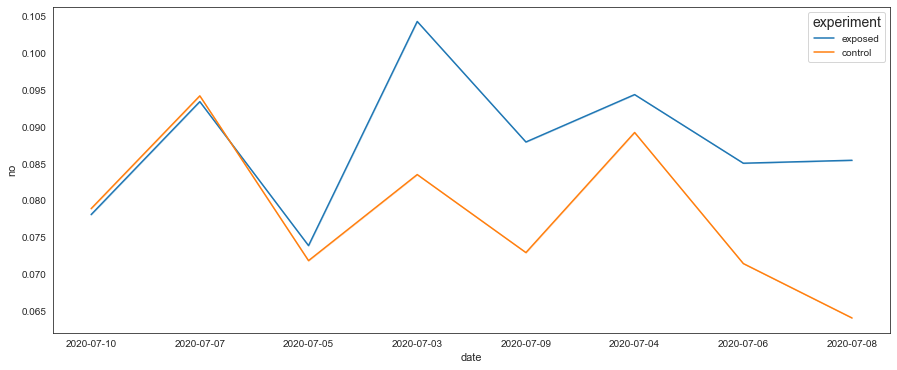

In [87]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data, x='date', y='no', hue='experiment', ci=False)
plt.show()

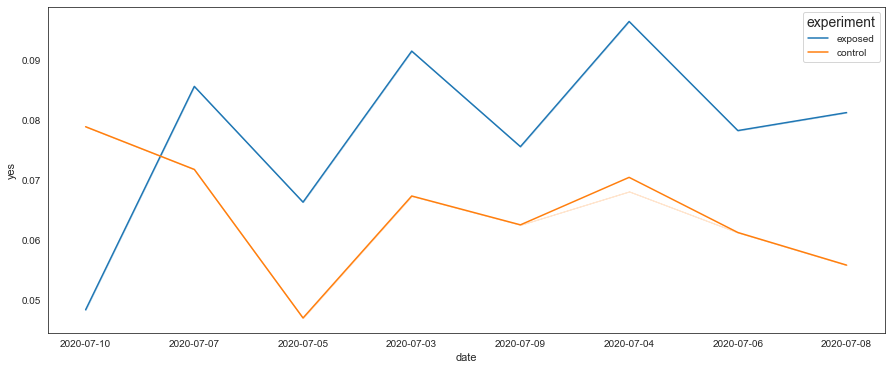

In [88]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data, x='date', y='yes', hue='experiment', ci=False)
plt.show()

## So till now! 
Data has columns: 
* experiment:   group the user belongs to - control or exposed
* browser:      the name of the browser the user used
* yes 1 :       if the user chooses the “Yes”  questionnaire |
* no 1 :        if the user chooses the “No”  questionnaire |


## Fuctions ...

In [89]:
def get_category_percent(row, decimal=1):
    '''
    Get percent of value distributed amoung colums
    :param row: list of columns from pandas dataframe
    '''
    
    return round(row/max(row)*100, decimal)

In [90]:
# We will transform the browser names .... to clean the values

def get_browser(row):
    '''
    Map various browser name with general one
    :param row: browser column of pandas dataframe
    
    '''
    
    browser = {'Chrome Mobile':'Chrome', 
                'Chrome Mobile WebView':'Chrome', 
                'Facebook':'Facebook',
                'Mobile Safari': 'Safari',
                'Chrome Mobile iOS':'Chrome', 
                'Samsung Internet':'Samsung',
                'Mobile Safari UI/WKWebView':'Safari', 
                'Chrome':'Chrome',
                'Opera Mini':'Opera',
                'Edge Mobile':'Edge',
                'Android':'Android',
                'Pinterest':'Pinterest',
                'Opera Mobile':'Opera',
                'Firefox Mobile':'Firefox',
                'Puffin':'Puffin'}
    
    return browser[row]
    

In [91]:
## Create a response column, to summarise the response as yes(1), no(1), no response(0)

def get_response(row):
    '''
    Create response column with ecnoded response values
    :param row: list of ['yes', 'no'] columns of pandas dataframe
    
    '''
    
    if row[0] == 1:
        res = 'yes'
    elif row[1] == 1:
        res = 'no'
    else:
        res = 'no response'
        
    return res

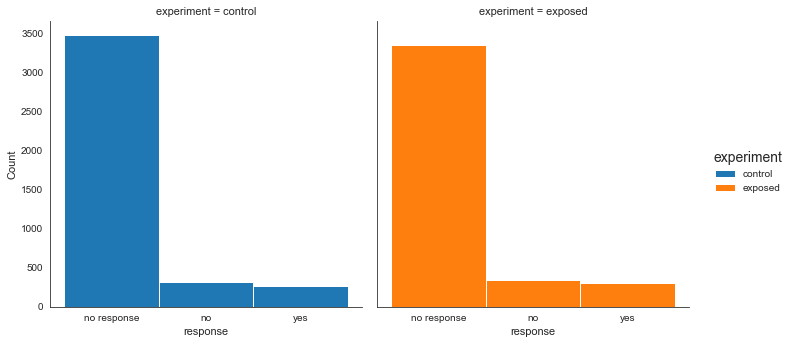

In [92]:
ads_data['response'] = ads_data[['yes', 'no']].apply(get_response, axis=1)

sns.displot(ads_data.sort_values(by='experiment'), x='response', col='experiment', hue='experiment', alpha=1)

plt.show()

In [93]:
ads_data.head()

,auction_id,experiment,device_make,platform_os,browser,yes,no,response
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,Generic Smartphone,6,Chrome Mobile,0,0,no response
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,Generic Smartphone,6,Chrome Mobile,0,0,no response
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,E5823,6,Chrome Mobile WebView,0,1,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,Samsung SM-A705FN,6,Facebook,0,0,no response
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,Generic Smartphone,6,Chrome Mobile,0,0,no response


In [94]:
response_summary = pd.pivot_table(data = ads_data, index='experiment', columns='response', aggfunc='count')['auction_id']

response_summary['total'] = response_summary.apply(sum, axis=1)
response_summary


display(response_summary)

response,no,no response,yes,total
experiment,,,,
control,322,3485,264,4071
exposed,349,3349,308,4006


In [95]:
response_summary = response_summary.apply(get_category_percent, axis=1)

response_summary.columns.name = 'response summary %'

response_summary = response_summary[['no','no response','yes']]
response_summary

response summary %,no,no response,yes
experiment,,,
control,7.9,85.6,6.5
exposed,8.7,83.6,7.7


## Let's converge to the data to include only those users who responded ...

In [96]:
df = ads_data[(ads_data['yes'] == 1) | (ads_data['no'] == 1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 2 to 8071
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   1243 non-null   object
 1   experiment   1243 non-null   object
 2   device_make  1243 non-null   object
 3   platform_os  1243 non-null   int64 
 4   browser      1243 non-null   object
 5   yes          1243 non-null   int64 
 6   no           1243 non-null   int64 
 7   response     1243 non-null   object
dtypes: int64(3), object(5)
memory usage: 87.4+ KB


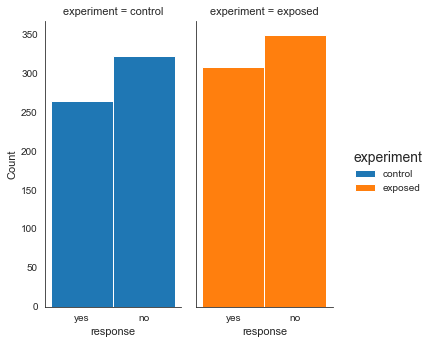

In [97]:
sns.displot(df.sort_values(by='experiment'), x='response', 
            col='experiment', hue='experiment', alpha=1, height=5, aspect=0.5)

plt.show()

In [98]:

df_response = pd.pivot_table(data=df, index='experiment', columns='response', aggfunc='count')['auction_id']

df_response['total'] = df_response.apply(sum, axis=1)
df_response

response,no,yes,total
experiment,,,
control,322,264,586
exposed,349,308,657


In [99]:
df_response = df_response.apply(get_category_percent, axis=1)

df_response.columns.name = 'response summary'

df_response = df_response[['no','yes']]

display(df_response)

response summary,no,yes
experiment,,
control,54.9,45.1
exposed,53.1,46.9


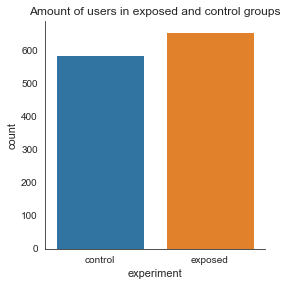

Percent of users in control group: 47.1%
Percent of users in exposed group: 52.9%


In [100]:
# categorical plot 
sns.catplot(data=df.sort_values(by='experiment'), x='experiment', 
            kind='count', height=4).set(title='Amount of users in exposed and control groups')
plt.show()

print('Percent of users in control group: {:.1%}'.format(len(df[df['experiment']=='control'])/len(df)))
print('Percent of users in exposed group: {:.1%}'.format(len(df[df['experiment']=='exposed'])/len(df)))

#### Browser ...

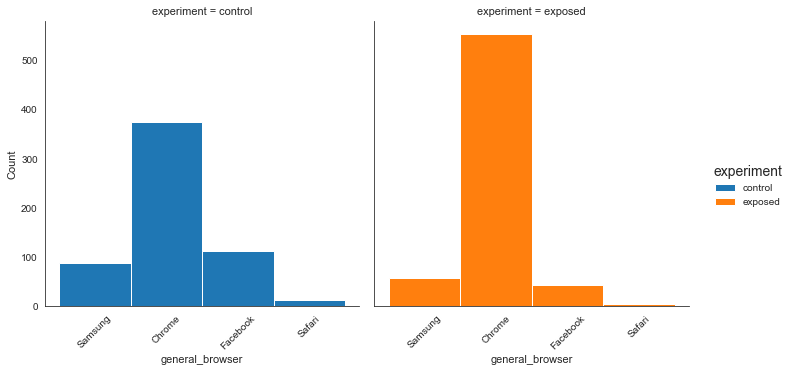

In [101]:
# Create column 'general_browser'
df['general_browser'] = df['browser'].apply(get_browser)

# Plot
browser_dist = sns.displot(df.sort_values(by='experiment'), x='general_browser', 
                col='experiment', hue='experiment', alpha=1)

browser_dist.set_xticklabels(rotation=45)
plt.show()


In [102]:
df.head()

,auction_id,experiment,device_make,platform_os,browser,yes,no,response,general_browser
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,E5823,6,Chrome Mobile WebView,0,1,no,Chrome
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,Generic Smartphone,6,Chrome Mobile,1,0,yes,Chrome
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,Generic Smartphone,6,Chrome Mobile,0,1,no,Chrome
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,Samsung SM-A202F,6,Facebook,1,0,yes,Facebook
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,Generic Smartphone,6,Chrome Mobile,0,1,no,Chrome


In [103]:
## Calculate percentage
browser_used = pd.pivot_table(data=df, index='experiment', columns='general_browser', aggfunc='count')['auction_id']

browser_used['total'] = browser_used.apply(sum, axis=1)

browser_used = browser_used.apply(get_category_percent, axis=1)

browser_used.columns.name = 'browser usage %'

browser_used.drop(columns='total', inplace=True)

browser_used = browser_used[['Samsung', 'Chrome', 'Facebook', 'Safari']]

display(browser_used)

browser usage %,Samsung,Chrome,Facebook,Safari
experiment,,,,
control,15.0,63.7,19.1,2.2
exposed,8.7,84.0,6.7,0.6


### Conclusion

- 83-85% of users didnt respond to a questionaire


- Both groups have conversion rate at around ~ 45-47%


- Sizes of control and exposed groups are similar


- Most users in both groups use Chrome browser - 63.7 % for control group, 84.0 % for exposed group


- Majority of platforms in both groups are represented by platform_os - 6

## A/B Test

Our goal is to analyse the results of A/B test and figure out wherever new disign of ad affects the behavior of users in terms of responding to BIO questionnaire.

* **Null Hypothesis Hₒ**: p = pₒ - There is no significant difference between the ad success rate of both groups <br />
* **Alternative Hypothesis Hₐ**: p ≠ pₒ - There is significant difference between the ad success rate of 
both groups.  <br />

Given we don’t know if the new design will perform better/worse/equal as our current design, we will perform a two-tailed test
Confidence Level: 95% (α=0.05)

In [104]:
df.head()

,auction_id,experiment,device_make,platform_os,browser,yes,no,response,general_browser
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,E5823,6,Chrome Mobile WebView,0,1,no,Chrome
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,Generic Smartphone,6,Chrome Mobile,1,0,yes,Chrome
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,Generic Smartphone,6,Chrome Mobile,0,1,no,Chrome
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,Samsung SM-A202F,6,Facebook,1,0,yes,Facebook
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,Generic Smartphone,6,Chrome Mobile,0,1,no,Chrome


In [105]:
len(df)

1243

In [106]:
df.groupby('experiment')['response'].value_counts()

experiment  response
control     no          322
            yes         264
exposed     no          349
            yes         308
Name: response, dtype: int64

In [107]:
n_E = df[df['experiment'] == 'exposed']['yes'].count()
n_C = df[ads_data['experiment'] == 'control']['yes'].count()
print('Exposed Group:', n_E)
print('Control Group:', n_C)

Exposed Group: 657
Control Group: 586


In [108]:
p_e = df.query('experiment=="exposed"')['yes'].mean()
p_c = df.query('experiment=="control"')['yes'].mean()
print(round(p_e,2))
print(round(p_c,2))

0.47
0.45


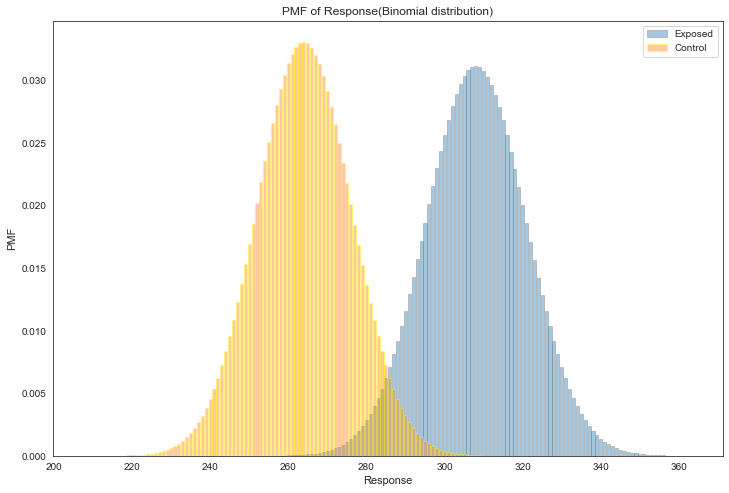

In [109]:
from scipy.stats import binom
plt.figure(figsize=(12,8))
# Create x-axis range and Binomial distributions A and B
x = np.arange(n_E*p_e - 100, n_C*p_c + 100)
binom_a = binom.pmf(x, n_E, p_e)
binom_b = binom.pmf(x, n_C, p_c)
# Plot Binomial distributions A and B
plt.bar(x, binom_a, alpha=0.4, label= 'Exposed' , edgecolor = 'grey')
plt.bar(x, binom_b, alpha=0.4, label= 'Control' , edgecolor = 'yellow')
plt.xlabel('Response')
plt.ylabel('PMF')
plt.title('PMF of Response(Binomial distribution)')
plt.legend()
plt.show()

### Lets simulate  ... the distrubution for different sample number to find good sample size

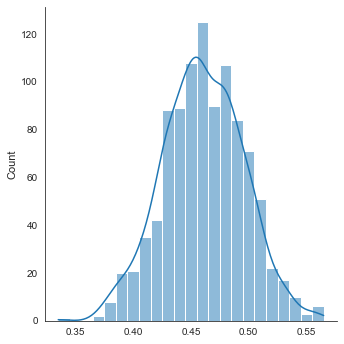

In [110]:
# Set random seed for repeatability
np.random.seed(47)
# Create an empty list to hold means
sampled_means = []
# Create loop to simulate 1000 sample means
for i in range(1000):
    # Take a sample of n=100
    sample = df['yes'].sample(200,replace=True)
    # Get the sample mean and append to list
    sample_mean = np.mean(sample)
    sampled_means.append(sample_mean)
# Plot distribution
sns.displot(sampled_means, kde=True)
plt.show()

In [111]:
df2 = df.sample(200, replace=True, random_state= 100)

In [112]:
df2

,auction_id,experiment,device_make,platform_os,browser,yes,no,response,general_browser
5322,a89b65d6-4350-4862-9292-12cbafe149d1,control,Generic Smartphone,6,Chrome Mobile,0,1,no,Chrome
556,1134407e-af87-434f-ac7c-299dff13dae2,control,Samsung SM-A705FN,6,Facebook,0,1,no,Facebook
2526,516788c6-1843-47f7-b6e1-2ad22a5d1735,exposed,Generic Smartphone,6,Chrome Mobile,0,1,no,Chrome
358,0af12f96-1167-4717-85c2-e4bab19a6741,exposed,Samsung SM-A405FN,6,Chrome Mobile WebView,1,0,yes,Chrome
5363,a9a0aa88-f2bf-44a5-8d33-2c77e56f559a,control,Generic Smartphone,6,Chrome Mobile,1,0,yes,Chrome
...,...,...,...,...,...,...,...,...,...
4297,896f1a69-489e-4a97-85d0-267cee43f5bf,exposed,Generic Smartphone,6,Chrome Mobile,0,1,no,Chrome
2364,4d658cfa-53b6-4efe-b38a-b48504c45511,exposed,Generic Smartphone,6,Chrome Mobile,0,1,no,Chrome
798,19ba2632-0167-4f74-b111-3093781d2aa3,exposed,Samsung SM-G900F,6,Chrome Mobile WebView,1,0,yes,Chrome
7210,e531bd16-3706-4042-8064-3ae47c953861,exposed,LYA-L09,6,Facebook,0,1,no,Facebook


In [113]:
df2.groupby('experiment')['response'].value_counts(normalize=True)
# distribution is perfect among the groups

experiment  response
control     yes         0.526882
            no          0.473118
exposed     no          0.514019
            yes         0.485981
Name: response, dtype: float64

## Fisher's exact test is a statistical test used to determine if there are non random associations between two categorical variables

### Since the variables to be tested are categorical ... so we chose fisher test

- There are several assumptions for Fisher test:

    1. Random sample - in each group data point should be from random sample.

    2. Independence - each observation should be independent
    
    3. Mutually exclusive groups - each category should be mutlually exclusive
    
    
- All of these assupmtions are valid for our case:

    1. All users from ech group are random without any particular bias
    2. Each user made independent decision
    3. Response is mutual - its either 'yes' or 'no'

In [114]:
contingency = pd.pivot_table(data=df2, index='experiment', columns='response', aggfunc='count')['auction_id']

contingency

response,no,yes
experiment,,
control,44,49
exposed,55,52


In [115]:
odds_ratio, test_p_value = stats.fisher_exact(contingency, alternative="two-sided")

print('Fisher test p-value: {:.2f}'.format(test_p_value))

Fisher test p-value: 0.57


## Since p value (0.57) > alpha (0.05) .. we accept the Null Hypothesis
### Conclude that there is no significant  .... effect of new ad camp and it has no effect on the audience